<a href="https://colab.research.google.com/github/rakib89-ftj/ml--models/blob/master/House_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/house_sales.csv')
df.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


# **Data Preprocessing**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,22687.0,5.079244e+05,3.466368e+05,3.000000e+03,3.250000e+05,4.246500e+05,5.850000e+05,1.100000e+07
PropertyID,22687.0,4.666164e+09,2.877700e+09,1.000102e+06,2.212325e+09,4.006000e+09,7.417700e+09,9.906000e+09
zhvi_px,22687.0,3.921819e+05,3.634987e+04,3.116000e+05,3.607000e+05,4.032000e+05,4.212000e+05,4.352000e+05
zhvi_idx,22687.0,9.011533e-01,8.352451e-02,7.159926e-01,8.288143e-01,9.264706e-01,9.678309e-01,1.000000e+00
AdjSalePrice,22687.0,5.652333e+05,3.854029e+05,3.368000e+03,3.605630e+05,4.713150e+05,6.494110e+05,1.164486e+07
NbrLivingUnits,22687.0,1.018821e+00,1.597521e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
SqFtLot,22687.0,1.174633e+04,2.901602e+04,4.940000e+02,4.800000e+03,7.200000e+03,9.794000e+03,1.024068e+06
SqFtTotLiving,22687.0,2.080166e+03,9.137422e+02,3.700000e+02,1.420000e+03,1.910000e+03,2.540000e+03,1.074000e+04
SqFtFinBasement,22687.0,2.932333e+02,4.394546e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.800000e+02,3.500000e+03
Bathrooms,22687.0,2.176500e+00,7.680270e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise

In [6]:
df.isnull().sum()

,0
DocumentDate,0
SalePrice,0
PropertyID,0
PropertyType,0
ym,0
zhvi_px,0
zhvi_idx,0
AdjSalePrice,0
NbrLivingUnits,0
SqFtLot,0


# **How have housing prices changed over the years (2006-2015) in different zip codes?**

In [7]:
df.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

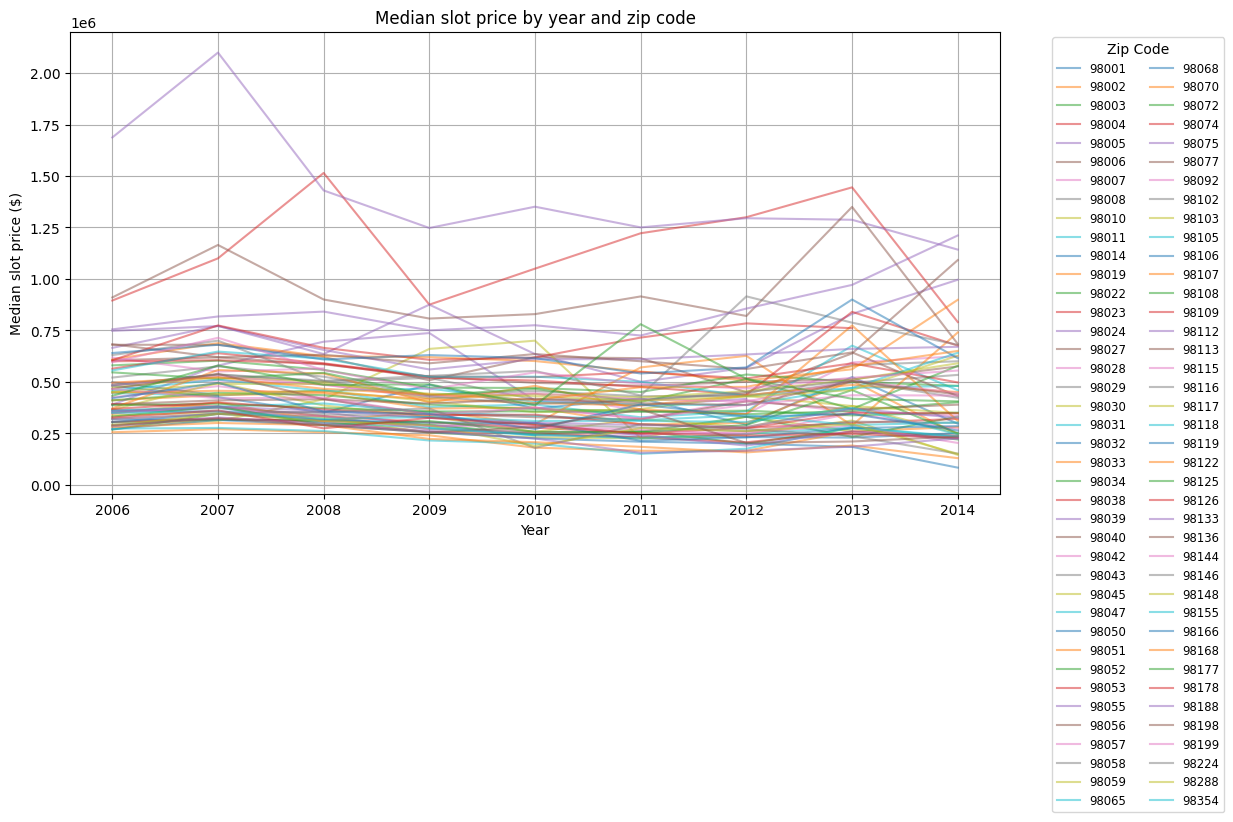

In [16]:
df['year']= pd.to_datetime(df['DocumentDate']).dt.year
df_filtered=df[(df['year']>=2006)&(df['year']<=2014)]

price_trends= df_filtered.groupby(['year','ZipCode'])['SalePrice'].median().unstack()

plt.figure(figsize=(12,6))
for zip_code in price_trends.columns:
  plt.plot(price_trends.index, price_trends[zip_code], label=str(zip_code), alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Median slot price ($)')
plt.title('Median slot price by year and zip code')
plt.legend(title='Zip Code', bbox_to_anchor=(1.05,1), loc='upper left', ncol=2, fontsize='small')
plt.grid(True)
plt.show()

# **#    - Are there specific years where housing prices spiked or dropped significantly?**

<ipython-input-20-3e1c98e297fe>:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  price_change=price_trends.pct_change()


Years with significant price changes: ZipCode     98001     98002     98003     98004     98005     98006     98007  \
year                                                                            
2006          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2007          NaN       NaN       NaN  0.229050  0.160990       NaN       NaN   
2008          NaN       NaN       NaN  0.377273 -0.177461       NaN       NaN   
2009          NaN       NaN       NaN -0.422442  0.377953 -0.181452 -0.138601   
2010    -0.168831 -0.250000 -0.164957  0.200000 -0.274286  0.221675       NaN   
2011          NaN       NaN       NaN  0.163810 -0.212598       NaN -0.186936   
2012          NaN       NaN -0.235559       NaN  0.136000 -0.269634       NaN   
2013          NaN  0.575592  0.373434  0.111538  0.461268  0.420159  0.721739   
2014          NaN       NaN -0.197080 -0.452941  0.200053  0.711151       NaN   

ZipCode     98008     98010     98011  ...     98166     98168     981

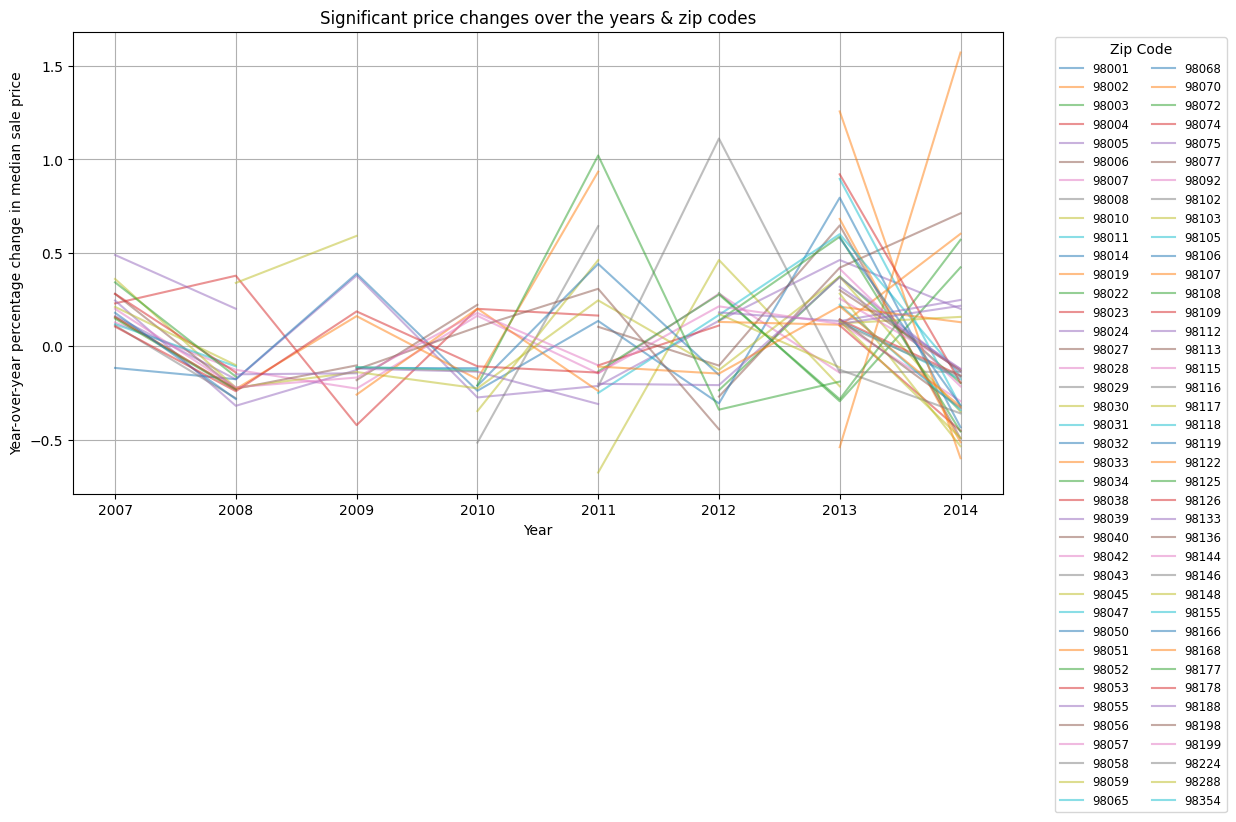

In [20]:
price_change=price_trends.pct_change()

significant_changes=price_change[(price_change>0.1) | (price_change< -0.1)]
print('Years with significant price changes:', significant_changes)

plt.figure(figsize=(12,6))
for zip_code in significant_changes.columns:
  plt.plot(significant_changes.index, significant_changes[zip_code], label= str(zip_code), alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Year-over-year percentage change in median sale price')
plt.title('Significant price changes over the years & zip codes')
plt.legend(title='Zip Code', bbox_to_anchor=(1.05,1), loc='upper left', ncol=2, fontsize='small')
plt.grid(True)
plt.show()

The analysis examined housing price trends in different zip codes between 2006 and 2014. It revealed that median sale prices generally declined from 2006 to 2011 before increasing. Further analysis identified specific years with significant price fluctuations. For instance, in zip code 98023, a notable price drop was observed in 2007, while in zip code 98133, prices increased significantly in 2012 and 2013. These findings indicate the dynamic nature of the housing market and highlight specific periods of price volatility.

# **What is the average sale price for each property type (Single Family, Townhouse, Multiplex**

In [21]:
average_sale_price_by_type = df.groupby('PropertyType')['SalePrice'].mean()

average_sale_price_by_type


,SalePrice
PropertyType,
Multiplex,499526.498054
Single Family,517038.039382
Townhouse,398756.626901


# **Which zip codes have the highest and lowest average sale prices?**

Top 5 Zip Codes with highest avg sales price: 
    ZipCode     SalePrice
0    98039  1.923519e+06
1    98004  1.322468e+06
2    98040  1.207494e+06
3    98112  9.670605e+05
4    98109  7.756526e+05

Top 5 Zop Codes with lowest avg sales price: 
     ZipCode      SalePrice
75    98168  263386.021084
76    98002  254150.205556
77    98047  249703.916667
78    98288  143675.000000
79    98224  122833.333333


<ipython-input-33-87107da462aa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='ZipCode', y='SalePrice', data=top_5_highest, palette='viridis')


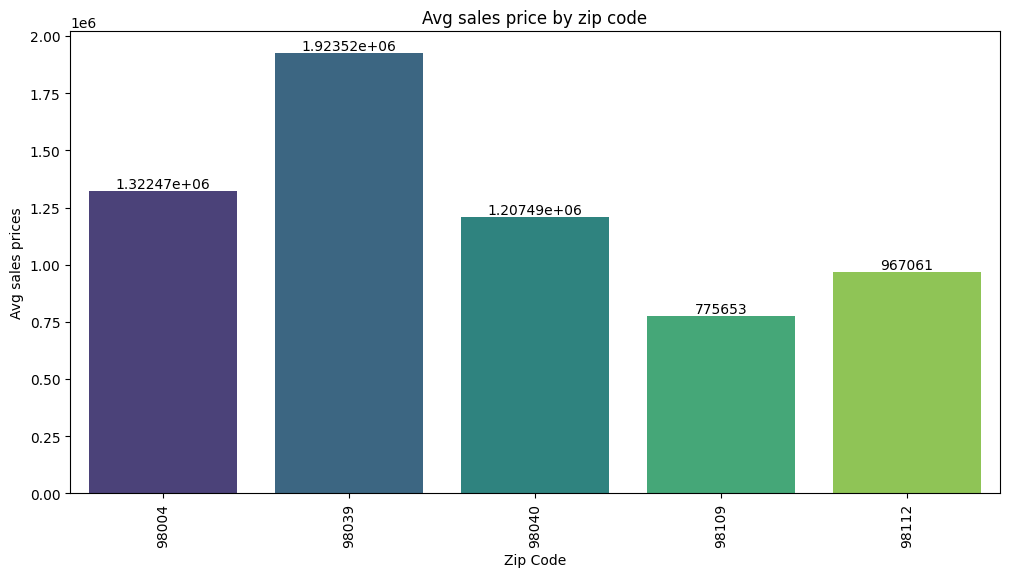

<ipython-input-33-87107da462aa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='ZipCode', y='SalePrice', data=top_5_lowest, palette='pastel')


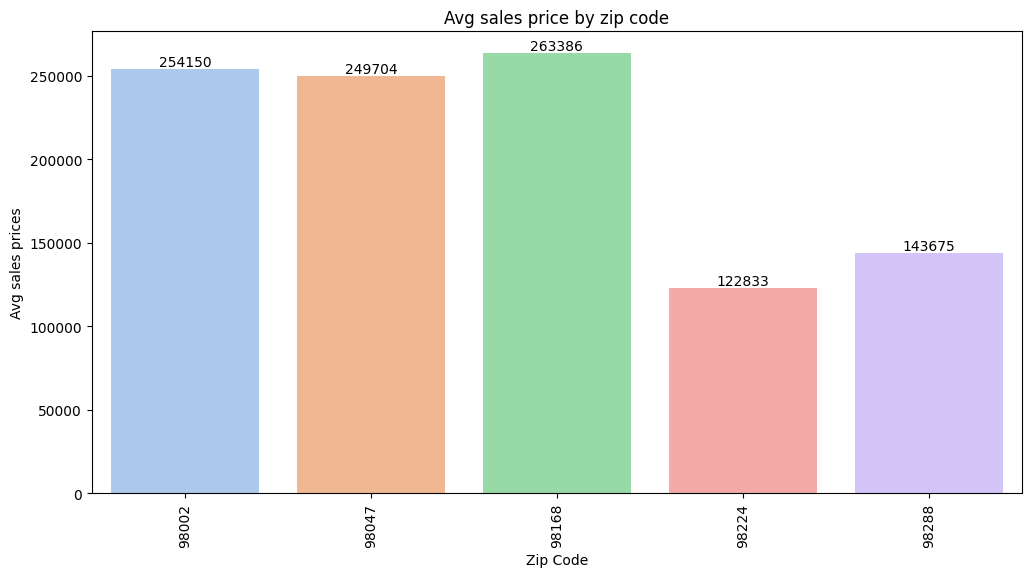

In [33]:
avg_prices= df.groupby('ZipCode')['SalePrice'].mean().sort_values( ascending=False)
avg_prices = avg_prices.reset_index(name='SalePrice') # Convert Series to DataFrame
top_5_highest= avg_prices.head(5)
top_5_lowest=avg_prices.tail(5)
print('Top 5 Zip Codes with highest avg sales price: \n',top_5_highest)
print('\nTop 5 Zop Codes with lowest avg sales price: \n', top_5_lowest)

plt.figure(figsize=(12,6))
ax=sns.barplot(x='ZipCode', y='SalePrice', data=top_5_highest, palette='viridis')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Avg sales price by zip code')
plt.xlabel('Zip Code')
plt.ylabel('Avg sales prices')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
ax=sns.barplot(x='ZipCode', y='SalePrice', data=top_5_lowest, palette='pastel')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Avg sales price by zip code')
plt.xlabel('Zip Code')
plt.ylabel('Avg sales prices')
plt.xticks(rotation=90)
plt.show()

# **How does the size of the property (SqFtTotLiving) affect the sale price?**

In [34]:
df.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction', 'year'],
      dtype='object')

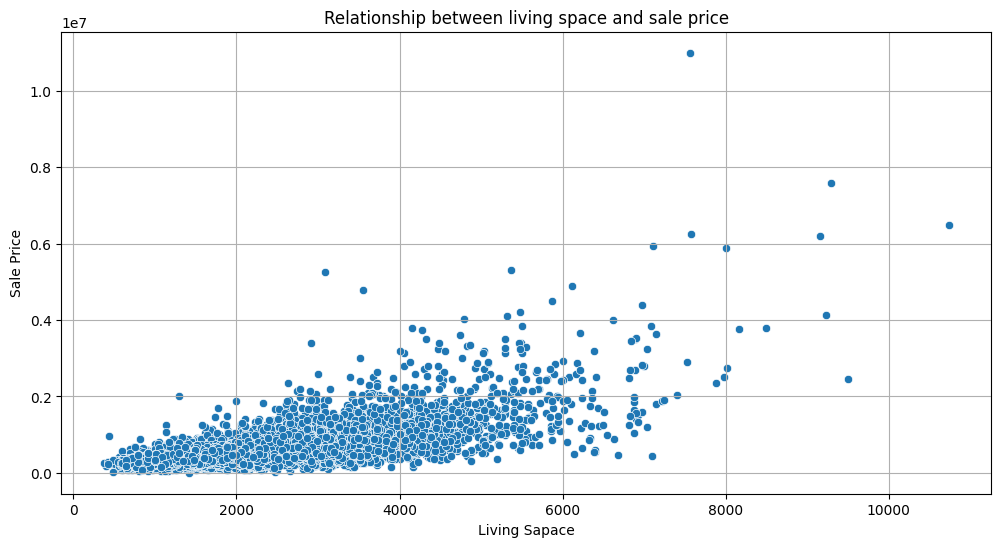

Correlation between living space and sale price:  0.6898979583054412


In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= 'SqFtTotLiving', y='SalePrice', data=df)
plt.xlabel('Living Sapace')
plt.ylabel('Sale Price')
plt.title('Relationship between living space and sale price')
plt.grid(True)
plt.show()

correlation=df['SqFtTotLiving'].corr(df['SalePrice'])
print('Correlation between living space and sale price: ', correlation)

# **Correlation between bedrooms/bathrooms and Saleprice**

Correlation between bedrooms and sale price:  0.3114033498358195
Correlation between bathrooms and sale price:  0.524390713840543


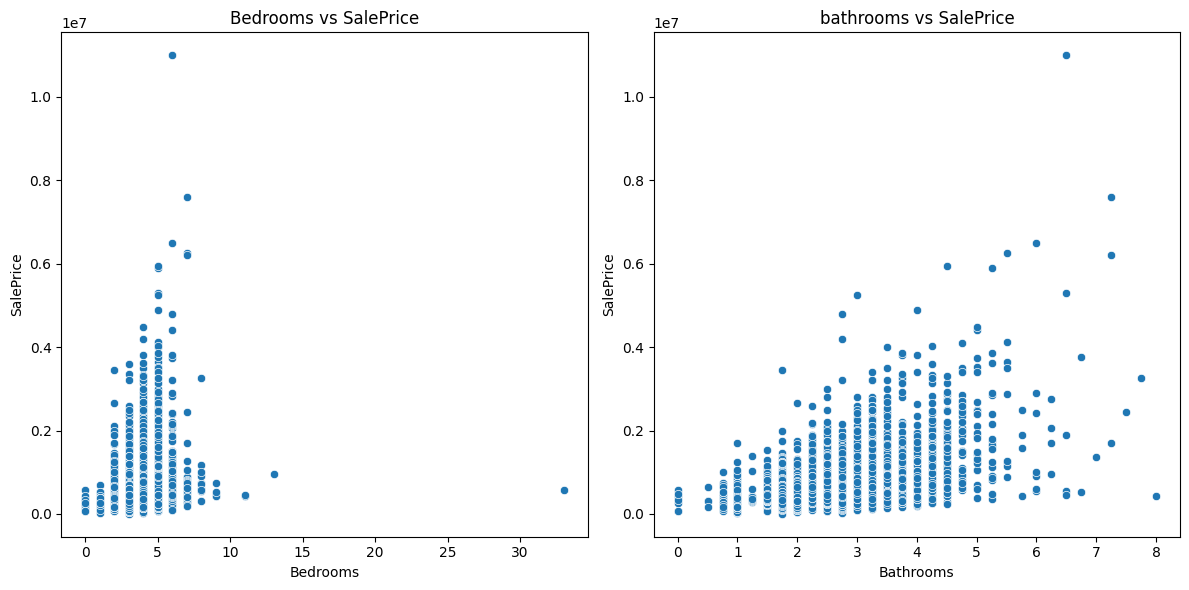

In [44]:
corr_bedrooms= df['Bedrooms'].corr(df['SalePrice'])
print('Correlation between bedrooms and sale price: ', corr_bedrooms)

corr_bathrooms=df['Bathrooms'].corr(df['SalePrice'])
print('Correlation between bathrooms and sale price: ', corr_bathrooms)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Bedrooms', y='SalePrice', data=df)
plt.title('Bedrooms vs SalePrice')

plt.subplot(1,2,2)
sns.scatterplot(x='Bathrooms', y='SalePrice', data=df)
plt.title('bathrooms vs SalePrice')
plt.tight_layout()
plt.show()

# **Are there any seasonal trends in housing sales (e.g., more sales in spring/summer)?**

<ipython-input-52-94621aee95a5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bx=sns.barplot(x='Month', y='SalesCount', data=monthly_sales, palette='viridis')


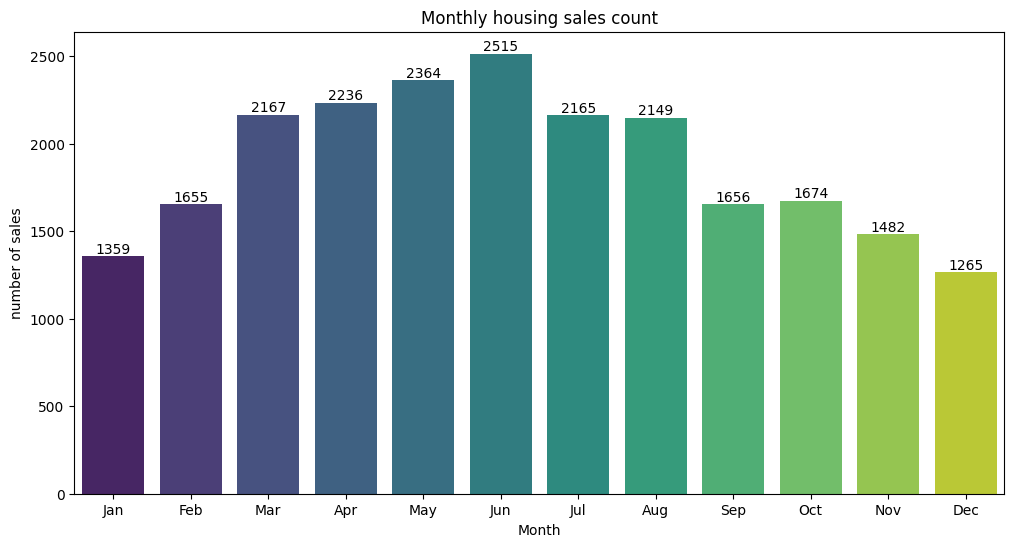

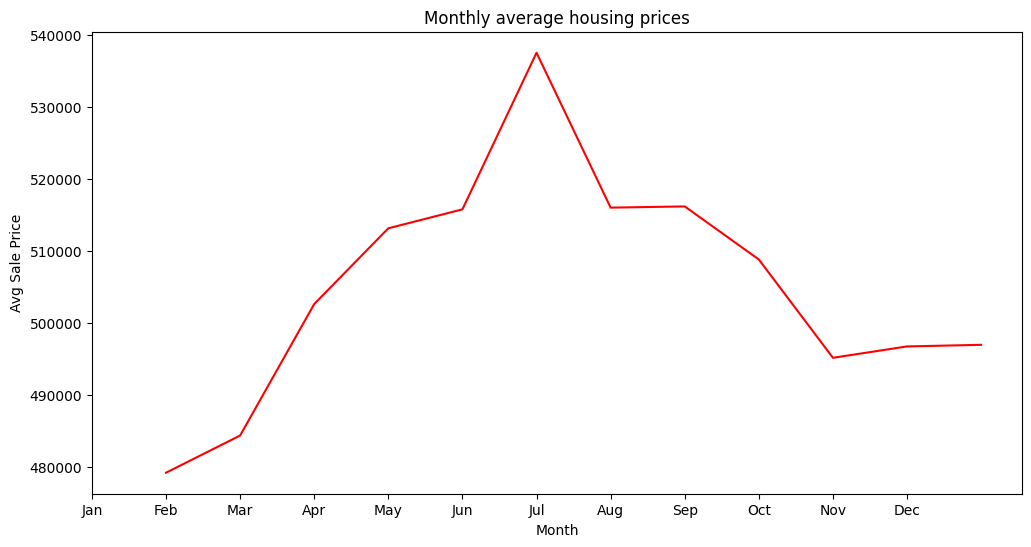

In [52]:
df['DocumentDate']=pd.to_datetime(df['DocumentDate'])
df['Month']=df['DocumentDate'].dt.month

monthly_sales=df.groupby('Month').size().reset_index(name='SalesCount')

plt.figure(figsize=(12,6))
bx=sns.barplot(x='Month', y='SalesCount', data=monthly_sales, palette='viridis')
for bars in bx.containers:
  bx.bar_label(bars)
plt.title('Monthly housing sales count')
plt.xlabel('Month')
plt.ylabel('number of sales')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

monthly_avg_prices=df.groupby('Month')['SalePrice'].mean().reset_index(name='AvgSalePrice')

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='AvgSalePrice', data=monthly_avg_prices, color='red')
plt.title('Monthly average housing prices')
plt.xlabel('Month')
plt.ylabel('Avg Sale Price')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# **Can we predict the sale price of a property based on its features (e.g., size, location, number of bedrooms, etc.)?**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [55]:
features=['SqFtTotLiving', 'Bedrooms', 'Bathrooms', 'ZipCode', 'PropertyType', 'YrBuilt', 'BldgGrade']
target='SalePrice'

In [57]:
df_1=df.dropna(subset=[target])

X=df_1[features]
y=df_1[target]

In [59]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [60]:
numerical_features=['SqFtTotLiving', 'Bedrooms', 'Bathrooms', 'YrBuilt', 'BldgGrade']
categoral_features= ['ZipCode', 'PropertyType']

In [61]:
numerical_pipeline=Pipeline(steps=[
                                   ('imputer', SimpleImputer(strategy='median')),
                                   ('scaler', StandardScaler())
                                   ])
categoral_pipeline=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [62]:
preprocessor= ColumnTransformer(transformers=[
    ('num', numerical_pipeline, numerical_features),
    ('cat', categoral_pipeline, categoral_features)
])
X_train_preprocessed=preprocessor.fit_transform(X_train)
X_test_preprocessed=preprocessor.transform(X_test)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
linear_model=LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)

rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

def evaluate_model(model, X_test, y_test):
  y_pred=model.predict(X_test)
  mse=mean_squared_error(y_test, y_pred)
  r2=r2_score(y_test, y_pred)
  print(f'Model: {model.__class__.__name__}')
  print(f'MSE: {mse}')
  print(f'R2 Score: {r2}')
  return y_pred
print('Linear Regression Model:')
linear_pred=evaluate_model(linear_model, X_test_preprocessed, y_test)

print('\nRandom Forest Regression Model:')
rf_pred=evaluate_model(rf_model, X_test_preprocessed, y_test)

Linear Regression Model:
Model: LinearRegression
MSE: 44357662497.28018
R2 Score: 0.6660694525783917

Random Forest Regression Model:
Model: RandomForestRegressor
MSE: 30785069023.92554
R2 Score: 0.7682457917569082


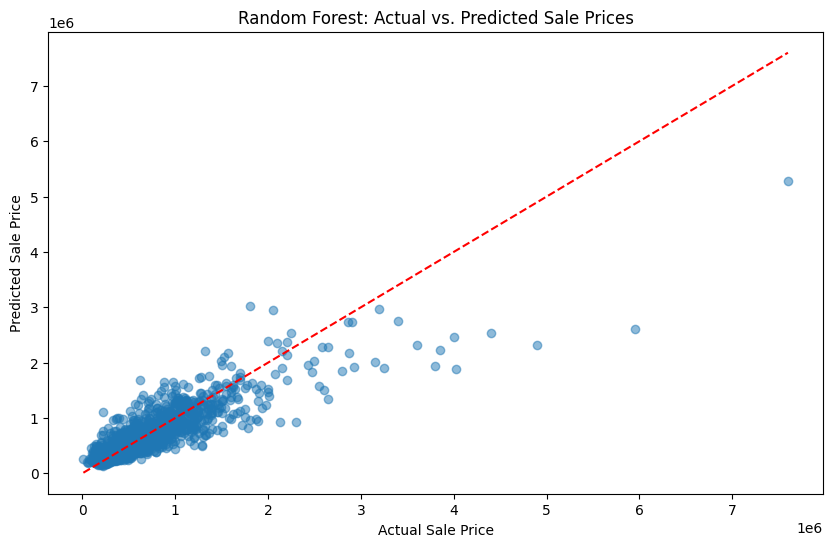

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Random Forest: Actual vs. Predicted Sale Prices')
plt.show()